In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Javiera_Research')

In [ ]:
!ls

 cleaned_data  'General presentation.gslides'   notebooks


# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta

# load cleaned data

In [ ]:
!ls cleaned_data/

Codings.csv		       og_columns.txt
cols_deleted.txt	       ukb43673_57cols.csv
df_cluster_encoded.csv	       ukb43673_61cols_1yr.csv
df_cluster_encoded_result.csv  ukb43673_72cols.csv
fil_1yr_53cols_pos_all.csv     ukb43673_74cols_1yr.csv
fil_1yr_53cols_pos_mixed.csv   ukb43673_74cols_6mo.csv
fil_1yr_64cols_pos_mixed.csv   ukb43673_76cols_1yr.csv
fil_1yr_66cols_pos_mixed.csv   ukb43673_correlation_cols_1yr.csv
fil_columns.txt		       ukb_response_impute_ref_stats_group_ds3.csv
javie_filtered_cols.csv


In [ ]:
# df_1yr = pd.read_csv('cleaned_data/ukb43673_74cols_1yr.csv')
df_1yr = pd.read_csv('cleaned_data/ukb43673_correlation_cols_1yr.csv')
df_1yr

,eid,31-0.0,53-2.0,53-3.0,1930-2.0,2020-2.0,2030-2.0,20400-0.0,20425-0.0,20458-0.0,20460-0.0,20505-0.0,20506-0.0,20507-0.0,20508-0.0,20509-0.0,20510-0.0,20511-0.0,20512-0.0,20513-0.0,20514-0.0,20515-0.0,20516-0.0,20517-0.0,20518-0.0,20519-0.0,20520-0.0,21003-2.0,21003-3.0,21023-0.0,center2_time_lapse1,center2_time_lapse2,center3_time_lapse1,center3_time_lapse2
0,1000993,1.0,2017-06-21,2019-10-14,0.0,0.0,0.0,2016-07-28,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,59.0,62.0,2017-04-11,328 days,71 days,1173 days,916 days
1,1001367,1.0,2017-08-16,NaN,0.0,0.0,0.0,2016-09-30,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,78.0,NaN,2017-08-24,320 days,-8 days,NaN,NaN
2,1003110,1.0,2016-05-25,NaN,0.0,0.0,1.0,2016-08-18,1.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,64.0,NaN,2017-04-28,-85 days,-338 days,NaN,NaN
3,1003668,1.0,2017-02-15,2019-10-08,1.0,0.0,0.0,2016-09-13,-121.0,3.0,-121.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,54.0,57.0,2017-05-11,155 days,-85 days,1120 days,880 days
4,1003823,1.0,2016-05-31,NaN,0.0,0.0,0.0,2016-08-24,0.0,2.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,59.0,NaN,2017-05-05,-85 days,-339 days,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,6021110,1.0,2016-07-25,NaN,0.0,0.0,0.0,2016-08-19,0.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,54.0,NaN,2017-05-04,-25 days,-283 days,NaN,NaN
6283,6022430,1.0,2016-12-18,NaN,0.0,0.0,0.0,2016-12-12,0.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,61.0,NaN,2017-04-28,6 days,-131 days,NaN,NaN
6284,6022902,1.0,2017-09-09,NaN,0.0,0.0,0.0,2016-09-22,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,61.0,NaN,2017-05-20,352 days,112 days,NaN,NaN
6285,6023768,0.0,2017-06-18,NaN,0.0,1.0,0.0,2016-08-17,-121.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,57.0,NaN,2017-04-26,305 days,53 days,NaN,NaN


In [ ]:
# drop the 4 date columns
df_1yr = df_1yr.drop(['21023-0.0','20400-0.0','53-2.0','53-3.0'], axis=1)

# drop the 3 demographic columns
df_1yr = df_1yr.drop(['21003-2.0','21003-3.0','31-0.0'], axis=1)

# drop the 4 time-lapse columns
df_1yr = df_1yr.drop(['center2_time_lapse1', 'center2_time_lapse2',
                      'center3_time_lapse1', 'center3_time_lapse2'], axis=1)

In [ ]:
# we now only contains the columns of correlation interest + the eid column
df_1yr

,eid,1930-2.0,2020-2.0,2030-2.0,20425-0.0,20458-0.0,20460-0.0,20505-0.0,20506-0.0,20507-0.0,20508-0.0,20509-0.0,20510-0.0,20511-0.0,20512-0.0,20513-0.0,20514-0.0,20515-0.0,20516-0.0,20517-0.0,20518-0.0,20519-0.0,20520-0.0
0,1000993,0.0,0.0,0.0,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
1,1001367,0.0,0.0,0.0,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1003110,0.0,0.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0
3,1003668,1.0,0.0,0.0,-121.0,3.0,-121.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
4,1003823,0.0,0.0,0.0,0.0,2.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,6021110,0.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6283,6022430,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6284,6022902,0.0,0.0,0.0,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6285,6023768,0.0,1.0,0.0,-121.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# look into missing data

In [ ]:
df_1yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eid        6287 non-null   int64  
 1   1930-2.0   6255 non-null   float64
 2   2020-2.0   6255 non-null   float64
 3   2030-2.0   6255 non-null   float64
 4   20425-0.0  6286 non-null   float64
 5   20458-0.0  6286 non-null   float64
 6   20460-0.0  6286 non-null   float64
 7   20505-0.0  6286 non-null   float64
 8   20506-0.0  6286 non-null   float64
 9   20507-0.0  6286 non-null   float64
 10  20508-0.0  6286 non-null   float64
 11  20509-0.0  6286 non-null   float64
 12  20510-0.0  6286 non-null   float64
 13  20511-0.0  6286 non-null   float64
 14  20512-0.0  6286 non-null   float64
 15  20513-0.0  6286 non-null   float64
 16  20514-0.0  6286 non-null   float64
 17  20515-0.0  6286 non-null   float64
 18  20516-0.0  6286 non-null   float64
 19  20517-0.0  6286 non-null   float64
 20  20518-0.

In [ ]:
df_1yr.isnull().sum()

eid           0
1930-2.0     32
2020-2.0     32
2030-2.0     32
20425-0.0     1
20458-0.0     1
20460-0.0     1
20505-0.0     1
20506-0.0     1
20507-0.0     1
20508-0.0     1
20509-0.0     1
20510-0.0     1
20511-0.0     1
20512-0.0     1
20513-0.0     1
20514-0.0     1
20515-0.0     1
20516-0.0     1
20517-0.0     1
20518-0.0     1
20519-0.0     1
20520-0.0     1
dtype: int64

In [ ]:
# look at the fraction of null values overall
print("percent of missing values over all:", 
      (df_1yr.isnull().sum().sum())/(len(df_1yr) * len(df_1yr.columns))*100)

percent of missing values over all: 0.0795291872117067


In [ ]:
# look at the fraction of null values for each column
num_missing = df_1yr.isnull().sum()
percent_missing = (df_1yr.isnull().sum())/len(df_1yr)*100
missing_value_df = pd.DataFrame({'column_name': df_1yr.columns,
                                 'number_missing': num_missing,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,number_missing,percent_missing
eid,eid,0,0.000000
1930-2.0,1930-2.0,32,0.508987
2020-2.0,2020-2.0,32,0.508987
2030-2.0,2030-2.0,32,0.508987
20425-0.0,20425-0.0,1,0.015906
20458-0.0,20458-0.0,1,0.015906
20460-0.0,20460-0.0,1,0.015906
20505-0.0,20505-0.0,1,0.015906
20506-0.0,20506-0.0,1,0.015906
20507-0.0,20507-0.0,1,0.015906


In [ ]:
# sort to see which columns have the most missing values
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(50)

,column_name,number_missing,percent_missing
2020-2.0,2020-2.0,32,0.508987
2030-2.0,2030-2.0,32,0.508987
1930-2.0,1930-2.0,32,0.508987
20509-0.0,20509-0.0,1,0.015906
20511-0.0,20511-0.0,1,0.015906
20519-0.0,20519-0.0,1,0.015906
20518-0.0,20518-0.0,1,0.015906
20517-0.0,20517-0.0,1,0.015906
20516-0.0,20516-0.0,1,0.015906
20515-0.0,20515-0.0,1,0.015906


In [ ]:
!ls

 cleaned_data  'General presentation.gslides'   notebooks


In [ ]:
# save the missing values dataframe
# missing_value_df.to_csv("cleaned_data/1yr_missing_value_df.csv", index = False)

## look into unique values of top 10 missing value columns

In [ ]:
# missing_value_df.sort_values('percent_missing', ascending=False, inplace = True)
missing_value_df

,column_name,number_missing,percent_missing
2020-2.0,2020-2.0,32,0.508987
2030-2.0,2030-2.0,32,0.508987
1930-2.0,1930-2.0,32,0.508987
20509-0.0,20509-0.0,1,0.015906
20511-0.0,20511-0.0,1,0.015906
20519-0.0,20519-0.0,1,0.015906
20518-0.0,20518-0.0,1,0.015906
20517-0.0,20517-0.0,1,0.015906
20516-0.0,20516-0.0,1,0.015906
20515-0.0,20515-0.0,1,0.015906


In [ ]:
top_10_missing = list(missing_value_df.index[:10])

# see the top 10 missing value columns
df_1yr.loc[:,top_10_missing]

,2020-2.0,2030-2.0,1930-2.0,20509-0.0,20511-0.0,20519-0.0,20518-0.0,20517-0.0,20516-0.0,20515-0.0
0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0
3,0.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0
4,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6282,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6283,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6284,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6285,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
unique = []
for col in top_10_missing:
  unique.append(df_1yr[col].unique())

top_10_missing_unique=pd.DataFrame({'column_name': top_10_missing,
                                    'unique_values': unique})

In [ ]:
top_10_missing_unique['num_unique'] = (top_10_missing_unique['unique_values']).apply(lambda x: len(x))
top_10_missing_unique

,column_name,unique_values,num_unique
0,2020-2.0,"[0.0, 1.0, -1.0, -3.0, nan]",5
1,2030-2.0,"[0.0, 1.0, -1.0, nan, -3.0]",5
2,1930-2.0,"[0.0, 1.0, -1.0, nan, -3.0]",5
3,20509-0.0,"[1.0, 2.0, 4.0, 3.0, -818.0, nan]",6
4,20511-0.0,"[1.0, 2.0, 4.0, 3.0, -818.0, nan]",6
5,20519-0.0,"[1.0, 2.0, 3.0, 4.0, -818.0, nan]",6
6,20518-0.0,"[1.0, 2.0, 3.0, 4.0, -818.0, nan]",6
7,20517-0.0,"[2.0, 1.0, 3.0, 4.0, -818.0, nan]",6
8,20516-0.0,"[1.0, 2.0, 4.0, -818.0, 3.0, nan]",6
9,20515-0.0,"[1.0, 2.0, 4.0, 3.0, -818.0, nan]",6


In [ ]:
# top_10_missing_unique.to_csv("cleaned_data/1yr_top10_missing_unique_df.csv", index = False)

In [ ]:
top_10_missing_unique.iloc[0,1]

array([ 0.,  1., -1., -3., nan])

# look into negative data

In [ ]:
# just by eye, we can see that we get a lot of negative values
# some -602, some -602, some -121, etc.
# but if we look into some of the columns, obviously the negative number does not make sense
# plan: mannually look into each column to determine if negative values make sense for this column or not
# then treat all negative values like missing values and filter them out

In [ ]:
df_1yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eid        6287 non-null   int64  
 1   1930-2.0   6255 non-null   float64
 2   2020-2.0   6255 non-null   float64
 3   2030-2.0   6255 non-null   float64
 4   20425-0.0  6286 non-null   float64
 5   20458-0.0  6286 non-null   float64
 6   20460-0.0  6286 non-null   float64
 7   20505-0.0  6286 non-null   float64
 8   20506-0.0  6286 non-null   float64
 9   20507-0.0  6286 non-null   float64
 10  20508-0.0  6286 non-null   float64
 11  20509-0.0  6286 non-null   float64
 12  20510-0.0  6286 non-null   float64
 13  20511-0.0  6286 non-null   float64
 14  20512-0.0  6286 non-null   float64
 15  20513-0.0  6286 non-null   float64
 16  20514-0.0  6286 non-null   float64
 17  20515-0.0  6286 non-null   float64
 18  20516-0.0  6286 non-null   float64
 19  20517-0.0  6286 non-null   float64
 20  20518-0.

In [ ]:
# grab only the columns with type float
# gets rid of the 4 date columns + 4 time lapse columns, and the eid column
df_1yr.select_dtypes(include=['float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1930-2.0   6255 non-null   float64
 1   2020-2.0   6255 non-null   float64
 2   2030-2.0   6255 non-null   float64
 3   20425-0.0  6286 non-null   float64
 4   20458-0.0  6286 non-null   float64
 5   20460-0.0  6286 non-null   float64
 6   20505-0.0  6286 non-null   float64
 7   20506-0.0  6286 non-null   float64
 8   20507-0.0  6286 non-null   float64
 9   20508-0.0  6286 non-null   float64
 10  20509-0.0  6286 non-null   float64
 11  20510-0.0  6286 non-null   float64
 12  20511-0.0  6286 non-null   float64
 13  20512-0.0  6286 non-null   float64
 14  20513-0.0  6286 non-null   float64
 15  20514-0.0  6286 non-null   float64
 16  20515-0.0  6286 non-null   float64
 17  20516-0.0  6286 non-null   float64
 18  20517-0.0  6286 non-null   float64
 19  20518-0.0  6286 non-null   float64
 20  20519-0.

In [ ]:
df_1yr_float = df_1yr.select_dtypes(include=['float64'])

In [ ]:
# calculate the sum of 1's (true negatives) and the percentage of them
number_negative = (df_1yr_float < 0).sum()
percent_negative = ((df_1yr_float < 0).sum())/len(df_1yr)*100
negative_value_df = pd.DataFrame({'column_name': df_1yr_float.columns,
                                  'number_negative' : number_negative,
                                  'percent_negative': percent_negative})
negative_value_df

,column_name,number_negative,percent_negative
1930-2.0,1930-2.0,75,1.192938
2020-2.0,2020-2.0,82,1.304279
2030-2.0,2030-2.0,129,2.051853
20425-0.0,20425-0.0,959,15.253698
20458-0.0,20458-0.0,25,0.397646
20460-0.0,20460-0.0,127,2.020041
20505-0.0,20505-0.0,27,0.429458
20506-0.0,20506-0.0,16,0.254493
20507-0.0,20507-0.0,17,0.270399
20508-0.0,20508-0.0,4,0.063623


In [ ]:
negative_value_df.sort_values('percent_negative', ascending = False, inplace=True)
negative_value_df.head(20)
  # all else have less than 10% negative value

,column_name,number_negative,percent_negative
20425-0.0,20425-0.0,959,15.253698
2030-2.0,2030-2.0,129,2.051853
20460-0.0,20460-0.0,127,2.020041
2020-2.0,2020-2.0,82,1.304279
1930-2.0,1930-2.0,75,1.192938
20513-0.0,20513-0.0,40,0.636233
20505-0.0,20505-0.0,27,0.429458
20458-0.0,20458-0.0,25,0.397646
20512-0.0,20512-0.0,22,0.349928
20520-0.0,20520-0.0,18,0.286305


In [ ]:
# save the negative value dataframes
# negative_value_df.to_csv("cleaned_data/1yr_negative_value_df.csv", index = False)

In [ ]:
# look into the unique values for a top negative value column
df_1yr['20425-0.0'].unique()

array([   0.,    1., -121., -818.,   nan])

## look into unique values of top 20 negative value columns

In [ ]:
negative_value_df

,column_name,number_negative,percent_negative
20425-0.0,20425-0.0,959,15.253698
2030-2.0,2030-2.0,129,2.051853
20460-0.0,20460-0.0,127,2.020041
2020-2.0,2020-2.0,82,1.304279
1930-2.0,1930-2.0,75,1.192938
20513-0.0,20513-0.0,40,0.636233
20505-0.0,20505-0.0,27,0.429458
20458-0.0,20458-0.0,25,0.397646
20512-0.0,20512-0.0,22,0.349928
20520-0.0,20520-0.0,18,0.286305


In [ ]:
top_20_neg = list(negative_value_df.index[:20])

# see the top 20 negative value columns
df_1yr.loc[:,top_20_neg]

,20425-0.0,2030-2.0,20460-0.0,2020-2.0,1930-2.0,20513-0.0,20505-0.0,20458-0.0,20512-0.0,20520-0.0,20507-0.0,20506-0.0,20509-0.0,20515-0.0,20510-0.0,20516-0.0,20517-0.0,20519-0.0,20514-0.0,20518-0.0
0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
1,0.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,3.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0
3,-121.0,0.0,-121.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0
4,0.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6283,0.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6284,0.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6285,-121.0,0.0,4.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
unique = []
for col in top_20_neg:
  unique.append(df_1yr[col].unique())

top_20_neg_unique=pd.DataFrame({'column_name': top_20_neg,
                                'unique_values': unique})

In [ ]:
top_20_neg_unique['num_unique'] = (top_20_neg_unique['unique_values']).apply(lambda x: len(x))
top_20_neg_unique

,column_name,unique_values,num_unique
0,20425-0.0,"[0.0, 1.0, -121.0, -818.0, nan]",5
1,2030-2.0,"[0.0, 1.0, -1.0, nan, -3.0]",5
2,20460-0.0,"[4.0, 3.0, -121.0, 2.0, 5.0, 1.0, -818.0, nan]",8
3,2020-2.0,"[0.0, 1.0, -1.0, -3.0, nan]",5
4,1930-2.0,"[0.0, 1.0, -1.0, nan, -3.0]",5
5,20513-0.0,"[1.0, 2.0, 3.0, -818.0, 4.0, nan]",6
6,20505-0.0,"[1.0, 2.0, 3.0, -818.0, 4.0, nan]",6
7,20458-0.0,"[2.0, 3.0, 4.0, 1.0, -121.0, 5.0, 6.0, -818.0,...",9
8,20512-0.0,"[1.0, 2.0, 3.0, 4.0, -818.0, nan]",6
9,20520-0.0,"[1.0, 2.0, 4.0, 3.0, -818.0, nan]",6


In [ ]:
# top_20_neg_unique.to_csv("cleaned_data/1yr_top20_neg_unique_df.csv", index = False)

# Clean missing data

see how many samples we have left with no misisng data at all

In [ ]:
df_1yr.shape

(6287, 23)

In [ ]:
# a list of rows containing missing value or not
rows = df_1yr.isnull().any(axis=1)

# negate that to get rows that don't contain missing values
df_1yr[~(rows)].shape

(6254, 23)

In [ ]:
df_1yr_fil = df_1yr[~(rows)]

# Clean negative data for all columns

Depending on the encoding, classes like `prefer not to answer` and `do not know` could have values anywhere from `-818` to `-3` to evern positive `3`.

So, in order to filter those out, we need to know the encoding for our columns.

In [ ]:
df_1yr_fil.shape

(6254, 23)

In [ ]:
# gets rid of the 1 eid column
df_1yr_fil_float = df_1yr_fil.select_dtypes(include=['float64'])
df_1yr_fil_float.shape

(6254, 22)

In [ ]:
# calculate the sum of 1's (trues) and the percentage of them
number_negative = (df_1yr_fil_float < 0).sum()
percent_negative = ((df_1yr_fil_float < 0).sum())/len(df_1yr_fil)*100
negative_value_df_fil = pd.DataFrame({'column_name': df_1yr_fil_float.columns,
                                      'number_negative' : number_negative,
                                      'percent_negative': percent_negative})
negative_value_df_fil.head()

,column_name,number_negative,percent_negative
1930-2.0,1930-2.0,75,1.199232
2020-2.0,2020-2.0,82,1.311161
2030-2.0,2030-2.0,129,2.062680
20425-0.0,20425-0.0,952,15.222258
20458-0.0,20458-0.0,25,0.399744


In [ ]:
negative_value_df_fil.sort_values('percent_negative', ascending = False, inplace=True)
negative_value_df_fil.head(10)
  # all else have less than 10% negative value

,column_name,number_negative,percent_negative
20425-0.0,20425-0.0,952,15.222258
2030-2.0,2030-2.0,129,2.062680
20460-0.0,20460-0.0,126,2.014711
2020-2.0,2020-2.0,82,1.311161
1930-2.0,1930-2.0,75,1.199232
20513-0.0,20513-0.0,39,0.623601
20505-0.0,20505-0.0,27,0.431724
20458-0.0,20458-0.0,25,0.399744
20512-0.0,20512-0.0,22,0.351775
20520-0.0,20520-0.0,18,0.287816


In [ ]:
# load javi csv to get a list of the data types for each column
# categorical or integer
meta_df = pd.read_csv('cleaned_data/javie_filtered_cols.csv')
meta_df_cols = meta_df[['UDI','type','Coding']]
meta_df_cols

,UDI,type,Coding
0,21044-0.0,numerical,584
1,21048-0.0,ordinal,339
2,21052-0.0,ordinal,339
3,21053-0.0,ordinal,339
4,21054-0.0,ordinal,339
5,21055-0.0,ordinal,339
6,21060-0.0,ordinal,339
7,21051-0.0,ordinal,339
8,21050-0.0,ordinal,339
9,21059-0.0,ordinal,339


In [ ]:
# because we mannually added two 2 columns to this list, add them to the df
# other columns we added do not need to be considered anyways
# but here, these columns do not need to be considered either because they have no encoding

# i = len(meta_df_cols)
# meta_df_cols.loc[i] = ['21003-2.0', 'numerical']
#   # age for center 2
# meta_df_cols.loc[i+1] = ['31-0.0', 'numerical']
#   # sex

# meta_df_cols

In [ ]:
negative_value_df_fil = negative_value_df_fil.merge(meta_df_cols,
                                                    left_on='column_name',
                                                    right_on='UDI',
                                                    how='left')
# negative_value_df_fil

In [ ]:
negative_value_df_fil = negative_value_df_fil.drop(['UDI', 'type'], axis=1)
negative_value_df_fil

,column_name,number_negative,percent_negative,Coding
0,20425-0.0,952,15.222258,NaN
1,2030-2.0,129,2.062680,NaN
2,20460-0.0,126,2.014711,538.0
3,2020-2.0,82,1.311161,NaN
4,1930-2.0,75,1.199232,NaN
5,20513-0.0,39,0.623601,504.0
6,20505-0.0,27,0.431724,504.0
7,20458-0.0,25,0.399744,537.0
8,20512-0.0,22,0.351775,504.0
9,20520-0.0,18,0.287816,504.0


In [ ]:
# fill in some column info not from the beta javi cluster columns
negative_value_df_fil.loc[negative_value_df_fil['column_name'] == '20425-0.0',
                          'Coding'] = 502
negative_value_df_fil.loc[negative_value_df_fil['column_name'] == '2030-2.0',
                          'Coding'] = 100349

negative_value_df_fil.loc[negative_value_df_fil['column_name'] == '2020-2.0',
                          'Coding'] = 100349

negative_value_df_fil.loc[negative_value_df_fil['column_name'] == '1930-2.0',
                          'Coding'] = 100349

In [ ]:
negative_value_df_fil

,column_name,number_negative,percent_negative,Coding
0,20425-0.0,952,15.222258,502.0
1,2030-2.0,129,2.062680,100349.0
2,20460-0.0,126,2.014711,538.0
3,2020-2.0,82,1.311161,100349.0
4,1930-2.0,75,1.199232,100349.0
5,20513-0.0,39,0.623601,504.0
6,20505-0.0,27,0.431724,504.0
7,20458-0.0,25,0.399744,537.0
8,20512-0.0,22,0.351775,504.0
9,20520-0.0,18,0.287816,504.0


In [ ]:
ord_cols = negative_value_df_fil['column_name'].tolist()

In [ ]:
df_1yr_fil_ord = df_1yr_fil[ord_cols]
df_1yr_fil_ord.head()

,20425-0.0,2030-2.0,20460-0.0,2020-2.0,1930-2.0,20513-0.0,20505-0.0,20458-0.0,20512-0.0,20520-0.0,20507-0.0,20506-0.0,20509-0.0,20515-0.0,20516-0.0,20517-0.0,20510-0.0,20519-0.0,20514-0.0,20518-0.0,20508-0.0,20511-0.0
0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,3.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,-121.0,0.0,-121.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0
4,0.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0


In [ ]:
negative_value_df_fil

,column_name,number_negative,percent_negative,Coding
0,20425-0.0,952,15.222258,502.0
1,2030-2.0,129,2.062680,100349.0
2,20460-0.0,126,2.014711,538.0
3,2020-2.0,82,1.311161,100349.0
4,1930-2.0,75,1.199232,100349.0
5,20513-0.0,39,0.623601,504.0
6,20505-0.0,27,0.431724,504.0
7,20458-0.0,25,0.399744,537.0
8,20512-0.0,22,0.351775,504.0
9,20520-0.0,18,0.287816,504.0


In [ ]:
# get a list of all codings present for our ordinal features
ord_codings = list(negative_value_df_fil['Coding'].unique())
ord_codings

[502.0, 100349.0, 538.0, 504.0, 537.0]

In [ ]:
# change all to integers to match with coding_df later
for i in range(len(ord_codings)):
  ord_codings[i] = int(ord_codings[i])

ord_codings

[502, 100349, 538, 504, 537]

In [ ]:
coding_df = pd.read_csv('cleaned_data/Codings.csv', 
                        encoding = 'ISO-8859-1')

In [ ]:
coding_df.head()

,Coding,Value,Meaning
0,1,1,Yes
1,2,0,Other job (free text entry)
2,2,1,Managers and Senior Officials
3,2,11,Corporate Managers
4,2,111,Corporate Managers And Senior Officials


In [ ]:
coding_df.dtypes

Coding      int64
Value      object
Meaning    object
dtype: object

In [ ]:
# keep only codgins that are present in our dataframes
mask = coding_df['Coding'].isin(ord_codings)
coding_df = coding_df[mask]
coding_df

,Coding,Value,Meaning
92019,502,-121,Do not know
92020,502,-818,Prefer not to answer
92021,502,0,No
92022,502,1,Yes
92026,504,-818,Prefer not to answer
92027,504,1,Not at all
92028,504,2,Several days
92029,504,3,More than half the days
92030,504,4,Nearly every day
92173,537,-121,Do not know


In [ ]:
neg_lst = ['Prefer not to answer', 'Do not know']
coding_df[coding_df['Meaning'].isin(neg_lst)]['Value'].unique()

array(['-121', '-818', '-1', '-3'], dtype=object)

So we have just confirmed that the only values in our ordinal features that could correspond to the values we want to filter out is `-818`, `-121`,`-1`, and `-3`. We don't have those weird `1` or `2` as `prefer not to answers`, which means we do not need to filter by coding but can filter overall. 

In [ ]:
# grab the non-'neg' boolean row masks for ordinal features only
# this indicates if any feature values in a row are prefer not to answer or do not know
mask = (df_1yr_fil_ord==-818.0).any(axis=1) | (df_1yr_fil_ord==-121.0).any(axis=1) | (df_1yr_fil_ord==-1.0).any(axis=1) | (df_1yr_fil_ord==-3.0).any(axis=1)
mask

0       False
1       False
2       False
3        True
4       False
        ...  
6282    False
6283    False
6284    False
6285     True
6286    False
Length: 6254, dtype: bool

In [ ]:
# see the rows we will delete, the rows that contains at least 1 'neg' value for ordinal features
df_1yr_fil_ord[mask]

,20425-0.0,2030-2.0,20460-0.0,2020-2.0,1930-2.0,20513-0.0,20505-0.0,20458-0.0,20512-0.0,20520-0.0,20507-0.0,20506-0.0,20509-0.0,20515-0.0,20516-0.0,20517-0.0,20510-0.0,20519-0.0,20514-0.0,20518-0.0,20508-0.0,20511-0.0
3,-121.0,0.0,-121.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0
5,0.0,-1.0,3.0,0.0,0.0,2.0,3.0,4.0,2.0,2.0,4.0,2.0,2.0,2.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0
7,-121.0,0.0,2.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
15,1.0,-1.0,4.0,0.0,-1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0
23,-121.0,1.0,5.0,0.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,-121.0,1.0,4.0,0.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
6276,-121.0,0.0,4.0,0.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0
6279,0.0,-3.0,2.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0
6281,-121.0,0.0,4.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0


In [ ]:
# keep only rows with no 'negative' number in any of the ordinal columns
df_1yr_fil_ord[~mask]

,20425-0.0,2030-2.0,20460-0.0,2020-2.0,1930-2.0,20513-0.0,20505-0.0,20458-0.0,20512-0.0,20520-0.0,20507-0.0,20506-0.0,20509-0.0,20515-0.0,20516-0.0,20517-0.0,20510-0.0,20519-0.0,20514-0.0,20518-0.0,20508-0.0,20511-0.0
0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,3.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
6,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6280,0.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6282,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6283,0.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6284,0.0,0.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df_1yr_fil.shape

(6254, 23)

In [ ]:
df_1yr_fil = df_1yr_fil[~mask]
# then deleted rows that have any missing data 
# then deleted rows that have any 'negative' value (prefer not to answer / do not know class) in ordinal column

In [ ]:
df_1yr_fil.shape

(4940, 23)

In [ ]:
df_1yr_fil.to_csv('cleaned_data/fil_1yr_correlation_cols_pos_all.csv', index=False)

# look into correlation between features

Based on the ones Javi selected in the spreadsheet

In [ ]:
# lets first ordinally encode all columns so they don't have crazy different ranges


In [ ]:
dep_cat = ['1930-2.0', '2020-2.0','2030-2.0']
dep_ord = ['20518-0.0','20510-0.0','20507-0.0','20519-0.0','20514-0.0',
           '20511-0.0', '20513-0.0', '20508-0.0','20517-0.0', '20458-0.0', '20460-0.0']
anx_cat = ['20425-0.0']
anx_ord = ['20505-0.0','20512-0.0', '20506-0.0','20509-0.0','20516-0.0', '20515-0.0','20520-0.0']

Values nearing +1 indicate the presence of a strong positive relation between X and Y, whereas those nearing -1 indicate a strong negative relation between X and Y.
Values near to zero mean there is an absence of any relationship between X and Y.

## depression features

In [ ]:
dep_corr_df = df_1yr_fil[dep_cat+dep_ord].corr()

dep_corr_df

,1930-2.0,2020-2.0,2030-2.0,20518-0.0,20510-0.0,20507-0.0,20519-0.0,20514-0.0,20511-0.0,20513-0.0,20508-0.0,20517-0.0,20458-0.0,20460-0.0
1930-2.0,1.000000,0.310283,0.338922,0.151960,0.333973,0.321556,0.305012,0.301185,0.232533,0.177708,0.278498,0.215105,0.327856,-0.254799
2020-2.0,0.310283,1.000000,0.290758,0.168247,0.330920,0.333354,0.216062,0.285199,0.190069,0.231901,0.245250,0.185307,0.318031,-0.283764
2030-2.0,0.338922,0.290758,1.000000,0.164875,0.255413,0.329768,0.210109,0.219475,0.182128,0.163379,0.211313,0.176906,0.248622,-0.224422
20518-0.0,0.151960,0.168247,0.164875,1.000000,0.345906,0.328662,0.266447,0.314628,0.286603,0.284439,0.368246,0.199055,0.242649,-0.193698
20510-0.0,0.333973,0.330920,0.255413,0.345906,1.000000,0.589163,0.452113,0.719469,0.401619,0.448277,0.481811,0.351387,0.469855,-0.339582
20507-0.0,0.321556,0.333354,0.329768,0.328662,0.589163,1.000000,0.384156,0.496492,0.402740,0.435909,0.442920,0.291314,0.408190,-0.364149
20519-0.0,0.305012,0.216062,0.210109,0.266447,0.452113,0.384156,1.000000,0.472399,0.440513,0.240047,0.458384,0.460231,0.377376,-0.273228
20514-0.0,0.301185,0.285199,0.219475,0.314628,0.719469,0.496492,0.472399,1.000000,0.418248,0.409846,0.517660,0.332134,0.432426,-0.311747
20511-0.0,0.232533,0.190069,0.182128,0.286603,0.401619,0.402740,0.440513,0.418248,1.000000,0.227218,0.396986,0.331838,0.281152,-0.205872
20513-0.0,0.177708,0.231901,0.163379,0.284439,0.448277,0.435909,0.240047,0.409846,0.227218,1.000000,0.320938,0.193168,0.315976,-0.270207


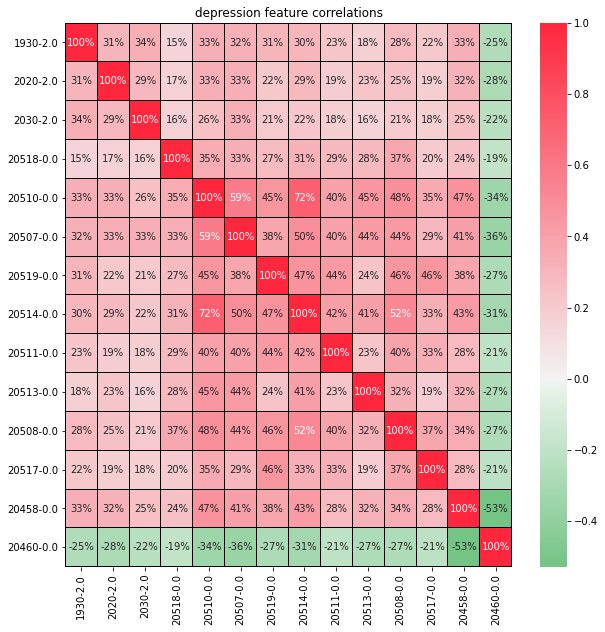

In [ ]:
plt.figure(figsize=(10,10))
plt.title("depression feature correlations")
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(dep_corr_df, cmap=rdgn, center=0.00, annot=True, fmt ='.0%', 
            linewidths=0.01, linecolor='black', cbar=True)

0.33397320215958715


Text(-0.01, 0.5, 'count')

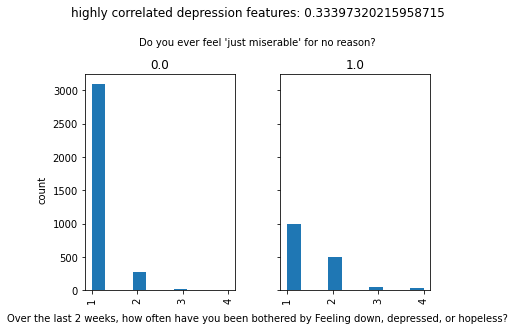

In [ ]:
# investigate highly correlated features of interest, between dependent and independent
print(dep_corr_df.iloc[0,4])
f1 = dep_corr_df.index[0]
f2 = dep_corr_df.columns[4]
df_1yr_fil.hist(column=f2, by=f1, sharey=True)
fig=plt.gcf()
fig.text(0.5, 1.1,f"highly correlated depression features: {dep_corr_df.iloc[0,4]}",ha='center', size='large')
fig.text(0.5, 0.04, 'Over the last 2 weeks, how often have you been bothered by Feeling down, depressed, or hopeless?',
         ha='center')
fig.text(0.5, 1.0, "Do you ever feel 'just miserable' for no reason?",
         ha='center')
fig.text(-0.01, 0.5, 'count', va='center', rotation='vertical')
# plt.xlabel("Do you ever feel 'just miserable' for no reason?")
# plt.ylabel('Over the last 2 weeks, how often have you been bothered by Feeling down, depressed, or hopeless?')

0.15195968226663925


Text(-0.01, 0.5, 'count')

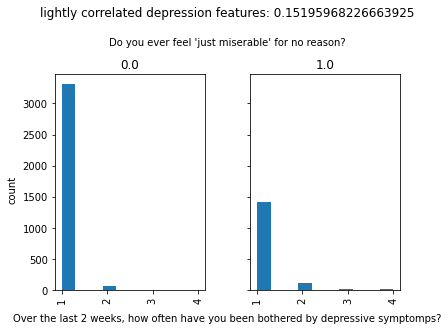

In [ ]:
# investigate lightly correlated features of interest, between dependent and independent
print(dep_corr_df.iloc[0,3])
f1 = dep_corr_df.index[0]
f2 = dep_corr_df.columns[3]
df_1yr_fil.hist(column=f2, by=f1, sharey=True)
fig=plt.gcf()
fig.text(0.5, 1.1,f"lightly correlated depression features: {dep_corr_df.iloc[0,3]}",ha='center', size='large')
fig.text(0.5, 0.04, 'Over the last 2 weeks, how often have you been bothered by depressive symptomps?',
         ha='center')
fig.text(0.5, 1.0, "Do you ever feel 'just miserable' for no reason?",
         ha='center')
fig.text(-0.01, 0.5, 'count', va='center', rotation='vertical')
# plt.xlabel("Do you ever feel 'just miserable' for no reason?")
# plt.ylabel('Over the last 2 weeks, how often have you been bothered by Feeling down, depressed, or hopeless?')

* 1	Not at all
* 2	Several days
* 3	More than half the days
* 4	Nearly every day

## anxiety features

In [ ]:
anx_corr_df = df_1yr_fil[anx_cat+anx_ord].corr()

anx_corr_df

,20425-0.0,20505-0.0,20512-0.0,20506-0.0,20509-0.0,20516-0.0,20515-0.0,20520-0.0
20425-0.0,1.000000,0.289696,0.343096,0.365843,0.404120,0.255760,0.369060,0.417087
20505-0.0,0.289696,1.000000,0.441554,0.493649,0.492993,0.438431,0.517968,0.510970
20512-0.0,0.343096,0.441554,1.000000,0.574452,0.628711,0.397251,0.508468,0.600912
20506-0.0,0.365843,0.493649,0.574452,1.000000,0.722865,0.402199,0.628710,0.684264
20509-0.0,0.404120,0.492993,0.628711,0.722865,1.000000,0.452660,0.657977,0.776223
20516-0.0,0.255760,0.438431,0.397251,0.402199,0.452660,1.000000,0.579316,0.434831
20515-0.0,0.369060,0.517968,0.508468,0.628710,0.657977,0.579316,1.000000,0.646944
20520-0.0,0.417087,0.510970,0.600912,0.684264,0.776223,0.434831,0.646944,1.000000


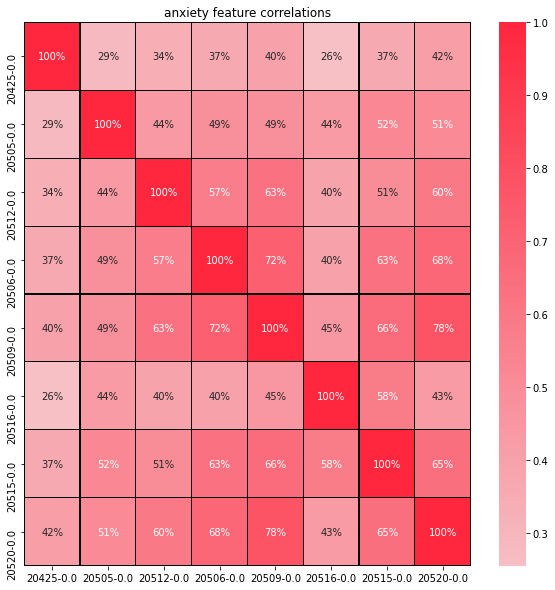

In [ ]:
plt.figure(figsize=(10,10))
plt.title("anxiety feature correlations")
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(anx_corr_df, cmap=rdgn, center=0.00, annot=True, fmt ='.0%', 
            linewidths=0.01, linecolor='black', cbar=True)

0.41708719515178266


Text(-0.01, 0.5, 'count')

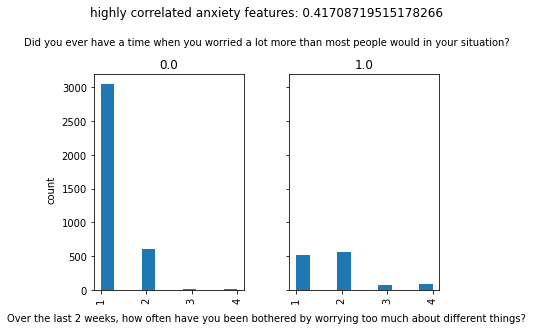

In [ ]:
# investigate highly correlated features of interest, between dependent and independent
print(anx_corr_df.iloc[0,-1])
f1 = anx_corr_df.index[0]
f2 = anx_corr_df.columns[-1]
df_1yr_fil.hist(column=f2, by=f1, sharey=True)
fig=plt.gcf()
fig.text(0.5, 1.1,f"highly correlated anxiety features: {anx_corr_df.iloc[0,-1]}",ha='center', size='large')
fig.text(0.5, 0.04, 'Over the last 2 weeks, how often have you been bothered by worrying too much about different things?',
         ha='center')
fig.text(0.5, 1.0, "Did you ever have a time when you worried a lot more than most people would in your situation?",
         ha='center')
fig.text(-0.01, 0.5, 'count', va='center', rotation='vertical')
# plt.xlabel("Do you ever feel 'just miserable' for no reason?")
# plt.ylabel('Over the last 2 weeks, how often have you been bothered by Feeling down, depressed, or hopeless?')

0.25575971392809776


Text(-0.01, 0.5, 'count')

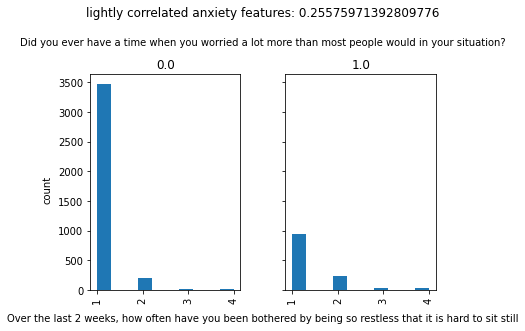

In [ ]:
# investigate lightly correlated features of interest, between dependent and independent
print(anx_corr_df.iloc[0,-3])
f1 = anx_corr_df.index[0]
f2 = anx_corr_df.columns[-3]
df_1yr_fil.hist(column=f2, by=f1, sharey=True)
fig=plt.gcf()
fig.text(0.5, 1.1,f"lightly correlated anxiety features: {anx_corr_df.iloc[0,-3]}",ha='center', size='large')
fig.text(0.5, 0.04, 'Over the last 2 weeks, how often have you been bothered by being so restless that it is hard to sit still',
         ha='center')
fig.text(0.5, 1.0, "Did you ever have a time when you worried a lot more than most people would in your situation?",
         ha='center')
fig.text(-0.01, 0.5, 'count', va='center', rotation='vertical')
# plt.xlabel("Do you ever feel 'just miserable' for no reason?")
# plt.ylabel('Over the last 2 weeks, how often have you been bothered by Feeling down, depressed, or hopeless?')

* 1	Not at all
* 2	Several days
* 3	More than half the days
* 4	Nearly every day